<a href="https://colab.research.google.com/github/shyamjith94/Tensorflow_2.0/blob/master/PROJECT_8_Classification_Traffic_Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using LeNet by Yann Lecun 

In [66]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
import os
import PIL
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix

In [29]:
with open("/content/drive/My Drive/Tensorflow_2.0/Data/traffic-signs-data/train.p", 'rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/Tensorflow_2.0/Data/traffic-signs-data/valid.p", 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/Tensorflow_2.0/Data/traffic-signs-data/test.p", 'rb') as test_data:
    test = pickle.load(test_data)

In [30]:
x_train, y_train = train["features"], train["labels"]
x_validation, y_validation = valid["features"], valid["labels"]
x_test, y_test = test["features"], test["labels"]

In [31]:
x_train.shape

(34799, 32, 32, 3)

In [32]:
y_train.shape

(34799,)

In [33]:
x_test.shape

(12630, 32, 32, 3)

In [34]:
y_test.shape

(12630,)

In [35]:
x_validation.shape

(4410, 32, 32, 3)

In [36]:
y_validation.shape

(4410,)

1

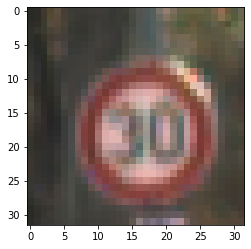

In [37]:
i = 3100
plt.imshow(x_train[i])
y_train[i]

In [38]:
print(np.unique(y_train))

# - Classes are as listed below: 
# - ( 0, b'Speed limit (20km/h)') 
# - ( 1, b'Speed limit (30km/h)')
# - ( 2, b'Speed limit (50km/h)') 
# - ( 3, b'Speed limit (60km/h)')
# - ( 4, b'Speed limit (70km/h)') 
# - ( 5, b'Speed limit (80km/h)')
# - ( 6, b'End of speed limit (80km/h)') 
# - ( 7, b'Speed limit (100km/h)')
# - ( 8, b'Speed limit (120km/h)') 
# - ( 9, b'No passing')
# - (10, b'No passing for vehicles over 3.5 metric tons')
# - (11, b'Right-of-way at the next intersection') 
# - (12, b'Priority road')
# - (13, b'Yield') 
# - (14, b'Stop') 
# - (15, b'No vehicles')
# - (16, b'Vehicles over 3.5 metric tons prohibited') 
# - (17, b'No entry')
# - (18, b'General caution') 
# - (19, b'Dangerous curve to the left')
# - (20, b'Dangerous curve to the right') 
# - (21, b'Double curve')
# - (22, b'Bumpy road') 
# - (23, b'Slippery road')
# - (24, b'Road narrows on the right') 
# - (25, b'Road work')
# - (26, b'Traffic signals') 
# - (27, b'Pedestrians') 
# - (28, b'Children crossing')
# - (29, b'Bicycles crossing') 
# - (30, b'Beware of ice/snow')
# - (31, b'Wild animals crossing')
# - (32, b'End of all speed and passing limits') 
# - (33, b'Turn right ahead')
# - (34, b'Turn left ahead') 
# - (35, b'Ahead only') 
# - (36, b'Go straight or right')
# - (37, b'Go straight or left') 
# - (38, b'Keep right') 
# - (39, b'Keep left')
# - (40, b'Roundabout mandatory') 
# - (41, b'End of no passing')
# - (42, b'End of no passing by vehicles over 3.5 metric tons')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


7

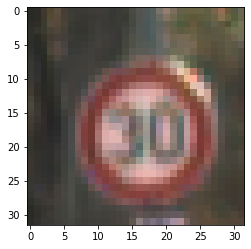

In [39]:
i = 3100
plt.imshow(x_train[i])
y_validation[i]

In [40]:
x_train, y_train = shuffle(x_train, y_train)
print(x_train.shape, y_train.shape)

(34799, 32, 32, 3) (34799,)


In [41]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis=3, keepdims=True)
print(x_train_gray.shape, x_test_gray.shape, x_validation_gray.shape)

(34799, 32, 32, 1) (12630, 32, 32, 1) (4410, 32, 32, 1)


In [42]:
x_train_gray_norm = (x_train_gray-128)/128
x_train_gray_norm

array([[[[-0.61197917],
         [-0.6015625 ],
         [-0.6015625 ],
         ...,
         [-0.53125   ],
         [-0.5390625 ],
         [-0.53645833]],

        [[-0.609375  ],
         [-0.59114583],
         [-0.59114583],
         ...,
         [-0.52604167],
         [-0.52604167],
         [-0.53645833]],

        [[-0.59635417],
         [-0.57291667],
         [-0.5703125 ],
         ...,
         [-0.51302083],
         [-0.515625  ],
         [-0.5234375 ]],

        ...,

        [[-0.6328125 ],
         [-0.63020833],
         [-0.62760417],
         ...,
         [-0.38541667],
         [-0.5234375 ],
         [-0.57552083]],

        [[-0.64322917],
         [-0.6328125 ],
         [-0.62760417],
         ...,
         [-0.36197917],
         [-0.5078125 ],
         [-0.57291667]],

        [[-0.63541667],
         [-0.62760417],
         [-0.62239583],
         ...,
         [-0.34114583],
         [-0.48958333],
         [-0.5625    ]]],


       [[[ 0.8515625 ],


In [43]:
x_test_gray_norm = (x_test_gray-128)/128
x_test_gray_norm

array([[[[ 0.1171875 ],
         [ 0.10416667],
         [ 0.11458333],
         ...,
         [-0.07552083],
         [-0.04947917],
         [-0.16666667]],

        [[ 0.12760417],
         [ 0.1171875 ],
         [ 0.12760417],
         ...,
         [ 0.140625  ],
         [ 0.13020833],
         [ 0.11979167]],

        [[ 0.125     ],
         [ 0.13020833],
         [ 0.109375  ],
         ...,
         [ 0.15364583],
         [ 0.15885417],
         [ 0.14583333]],

        ...,

        [[ 0.09635417],
         [ 0.07552083],
         [ 0.08333333],
         ...,
         [ 0.09635417],
         [ 0.09375   ],
         [ 0.1171875 ]],

        [[ 0.08854167],
         [ 0.08333333],
         [ 0.06770833],
         ...,
         [ 0.08072917],
         [ 0.08854167],
         [ 0.09635417]],

        [[ 0.078125  ],
         [ 0.06510417],
         [ 0.09114583],
         ...,
         [ 0.09375   ],
         [ 0.09895833],
         [ 0.10416667]]],


       [[[-0.50520833],


In [44]:
x_validation_gray_norm = (x_validation_gray-128)/128
x_validation_gray_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


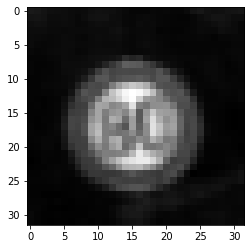

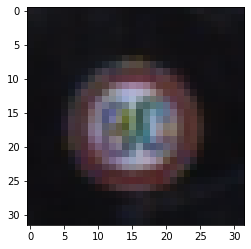

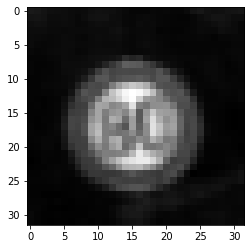

In [45]:
i=610
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap='gray')

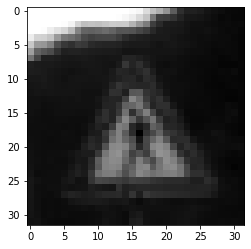

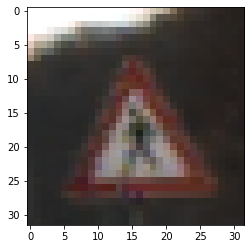

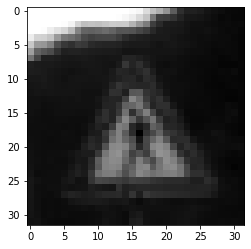

In [46]:
i=610
plt.imshow(x_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_test[i])
plt.figure()
plt.imshow(x_test_gray_norm[i].squeeze(), cmap='gray')

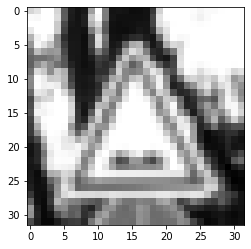

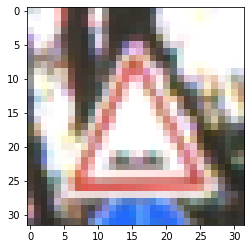

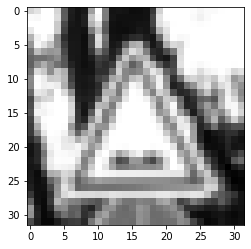

In [47]:
i=610
plt.imshow(x_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_validation[i])
plt.figure()
plt.imshow(x_validation_gray_norm[i].squeeze(), cmap='gray')

In [48]:
# Convolutional layer 1

# input = 32*32*1
# output = 28*28*6 -> (input-filter+1)/Stride => (32-5+1)/1 = #28
# filter = 5*5 imput depth 3 and output depth of 6
# poolinng = 28*28*6 -> 14*14*6

# Convolutional layer 2
# input = 14*14*6
# output = 10*10*16 -> (input-filter+1)/Stride => (14-5+1)/1 = #10
# poolinng = 10*10*16 -> 5*5*16

# Flattening Network
# 5*5*16 => 400

# Fully Connected
# inpiut => 400
# output => 120

# Fully Connected
# inpiut => 120
# output => 84

# Fully Connected
# inpiut => 84
# output => 43


In [49]:
lenet = models.Sequential()

lenet.add(layers.Conv2D(6, (5, 5), activation="relu", input_shape=(32,32,1)))
lenet.add(layers.AveragePooling2D()) # or MaxPooling

lenet.add(layers.Conv2D(16, (5,5), activation="relu"))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Flatten())

lenet.add(layers.Dense(units=120, activation="relu"))
lenet.add(layers.Dense(units=84, activation="relu"))
lenet.add(layers.Dense(units=43, activation="softmax"))

lenet.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [50]:
lenet.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [51]:
epohs_hist = lenet.fit(x_train_gray_norm, y_train, batch_size=50, verbose=1, validation_data=(x_validation_gray_norm, y_validation), epochs=50)

Epoch 1/50
696/696 [==============================] - 22s 32ms/step - loss: 1.5033 - accuracy: 0.5846 - val_loss: 0.6879 - val_accuracy: 0.7878
Epoch 2/50
696/696 [==============================] - 22s 31ms/step - loss: 0.3859 - accuracy: 0.8909 - val_loss: 0.5095 - val_accuracy: 0.8556
Epoch 3/50
696/696 [==============================] - 22s 31ms/step - loss: 0.2267 - accuracy: 0.9379 - val_loss: 0.4670 - val_accuracy: 0.8628
Epoch 4/50
696/696 [==============================] - 21s 31ms/step - loss: 0.1524 - accuracy: 0.9593 - val_loss: 0.4091 - val_accuracy: 0.8891
Epoch 5/50
696/696 [==============================] - 22s 32ms/step - loss: 0.1132 - accuracy: 0.9697 - val_loss: 0.3985 - val_accuracy: 0.8834
Epoch 6/50
696/696 [==============================] - 22s 31ms/step - loss: 0.0831 - accuracy: 0.9774 - val_loss: 0.3855 - val_accuracy: 0.8916
Epoch 7/50
696/696 [==============================] - 22s 32ms/step - loss: 0.0701 - accuracy: 0.9792 - val_loss: 0.4503 - val_accuracy:

In [53]:
score = lenet.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy {}'.format(score[1]))

395/395 [==============================] - 4s 10ms/step - loss: 1.2399 - accuracy: 0.9091
Test Accuracy 0.9091053009033203


In [55]:
epohs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
accuracy = epohs_hist.history["accuracy"]
loss = epohs_hist.history["loss"]
val_loss = epohs_hist.history["val_loss"]
val_accuracy = epohs_hist.history["val_accuracy"]


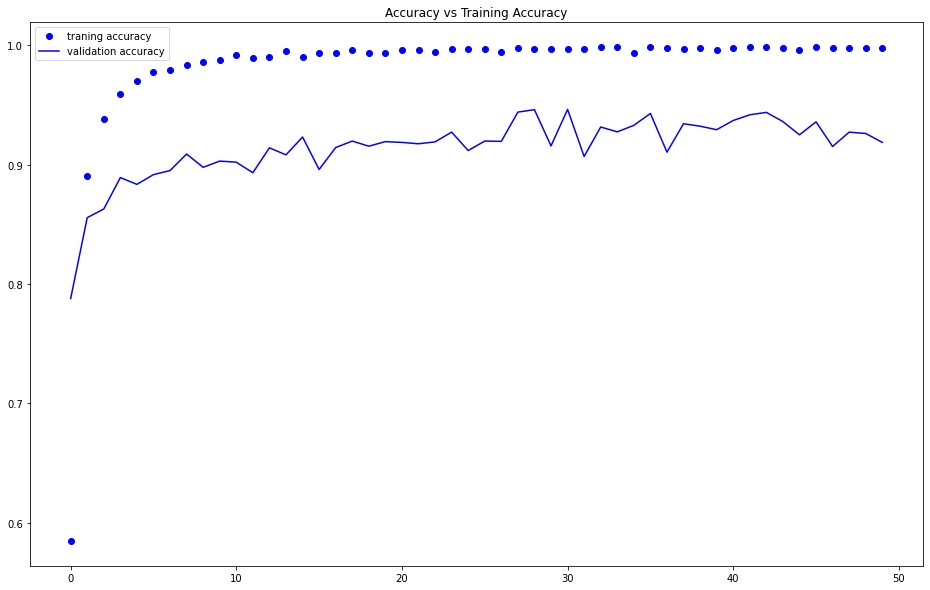

In [61]:
plt.figure(figsize=(16,10))
plt.plot(accuracy, 'bo', label="traning accuracy")
plt.plot(val_accuracy, 'b', label="validation accuracy")
plt.title("Accuracy vs Training Accuracy")
plt.legend()


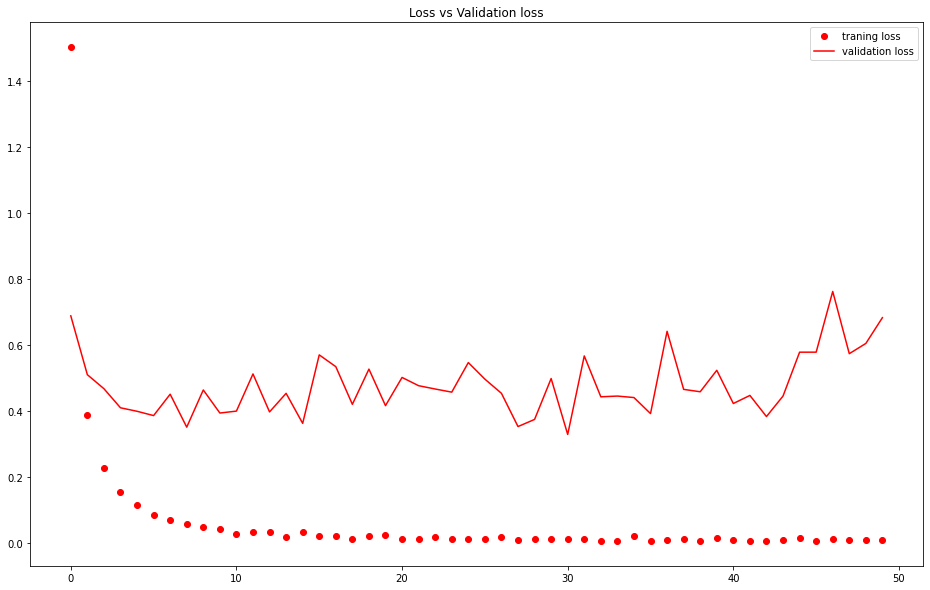

In [62]:
plt.figure(figsize=(16,10))
plt.plot(loss, 'ro', label="traning loss")
plt.plot(val_loss, 'r', label="validation loss")
plt.title("Loss vs Validation loss")
plt.legend()


In [72]:
prediction_class = lenet.predict_classes(x_test_gray_norm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [73]:
y_true = y_test

In [71]:
y_true

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

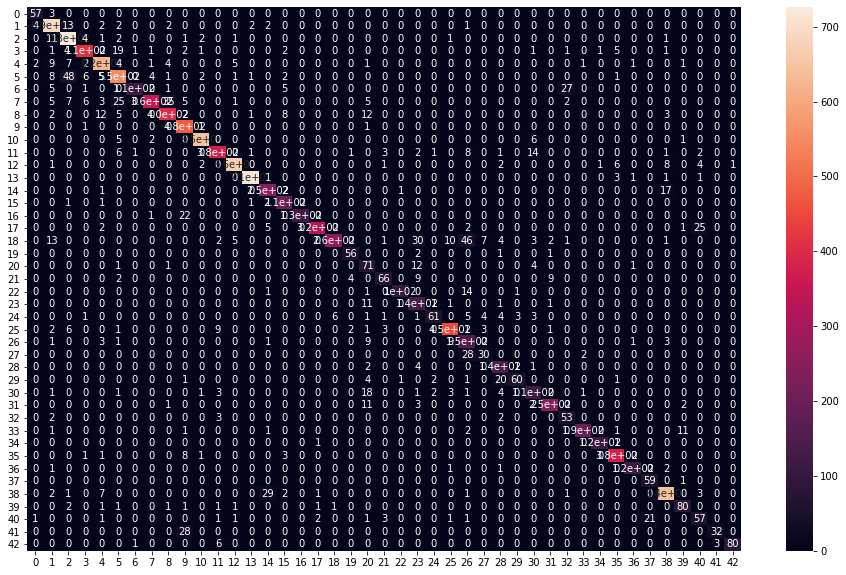

In [76]:
cm = confusion_matrix(y_true, prediction_class)
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True)

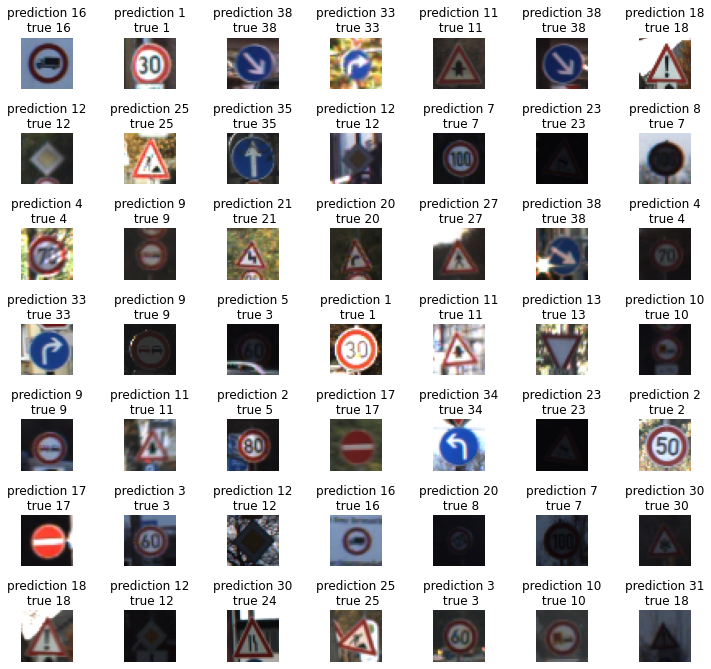

In [83]:
w = 7
l = 7
fig ,axes = plt.subplots(l , w, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(0, l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title("prediction {}\n true {}".format(prediction_class[i], y_true[i]))
    axes[i].axis("off")
plt.subplots_adjust(wspace=1)
